# Import Thư Viện

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
import re
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

# Xử Lý Dữ Liệu

In [3]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('fake_job_postings.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
df.shape

(17880, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
# Kiểm tra dữ liệu bị thiếu
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
# Tính phần trăm giá trị null trong mỗi cột
print(df.isnull().mean() * 100)

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64


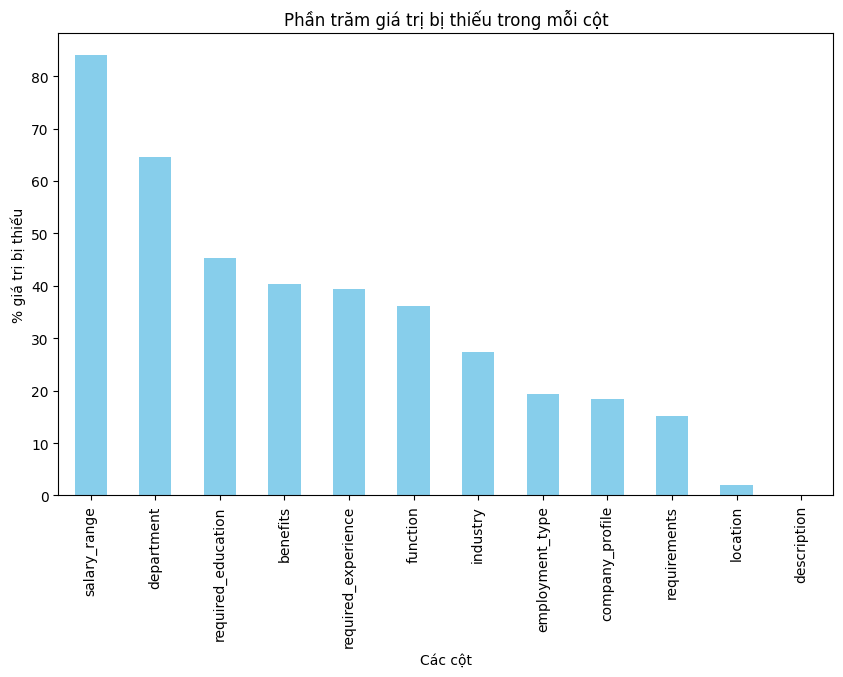

In [8]:
# Vẽ biểu đồ phần trăm giá trị null trong mỗi cột
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='skyblue')
plt.title('Phần trăm giá trị bị thiếu trong mỗi cột')
plt.ylabel('% giá trị bị thiếu')
plt.xlabel('Các cột')
plt.show()

In [9]:
# Chuyển các giá trị null trong các cột văn bản thành 'Missing'
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df[text_columns] = df[text_columns].fillna('Missing')

In [10]:
# Kiểm tra lại tổng số lượng giá trị null trong các cột này
print(df[text_columns].isnull().sum())

title              0
company_profile    0
description        0
requirements       0
benefits           0
dtype: int64


In [11]:
# Đối với các cột phân loại khác,thay thế các giá trị thiếu bằng các giá trị giữ chỗ thích hợp.
df.fillna({'location': 'Unknown', 'department': 'Unknown', 'salary_range': 'Not Specified', 'employment_type': 'Not Specified',
           'required_experience': 'Not Specified', 'required_education': 'Not Specified',
              'industry': 'Not Specified', 'function': 'Not Specified'}, inplace=True)

In [12]:
# Kiểm tra số lượng bản ghi trùng lặp
df.duplicated().sum()

np.int64(0)

In [13]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Specified,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Missing,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Not Specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Missing,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Not Specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,Not Specified,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Not Specified,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,Not Specified,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Unknown,Not Specified,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,Missing,0,0,0,Full-time,Not Specified,Not Specified,Not Specified,Not Specified,0
17878,17879,Graphic Designer,"NG, LA, Lagos",Unknown,Not Specified,Missing,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


# Trực Quan Hoá Dữ Liệu

In [14]:
# Đêm số lượng gian lận
print("Số Lượng Gian Lận:")
print(df['fraudulent'].value_counts())

Số Lượng Gian Lận:
fraudulent
0    17014
1      866
Name: count, dtype: int64


In [15]:
# Đếm số lượng bài đăng tuyển dụng
total_postings = len(df)

# Đếm số lượng bài đăng gian lận
fraudulent_postings = df['fraudulent'].value_counts().get(1, 0)

# Phần trăm bài đăng gian lận
fraudulent_percentage = (fraudulent_postings / total_postings) * 100

print(f"Tổng số bài đăng: {total_postings}")
print(f"Số bài đăng gian lận: {fraudulent_postings}")
print(f"Phần trăm bài đăng gian lận: {fraudulent_percentage:.2f}%")

Tổng số bài đăng: 17880
Số bài đăng gian lận: 866
Phần trăm bài đăng gian lận: 4.84%


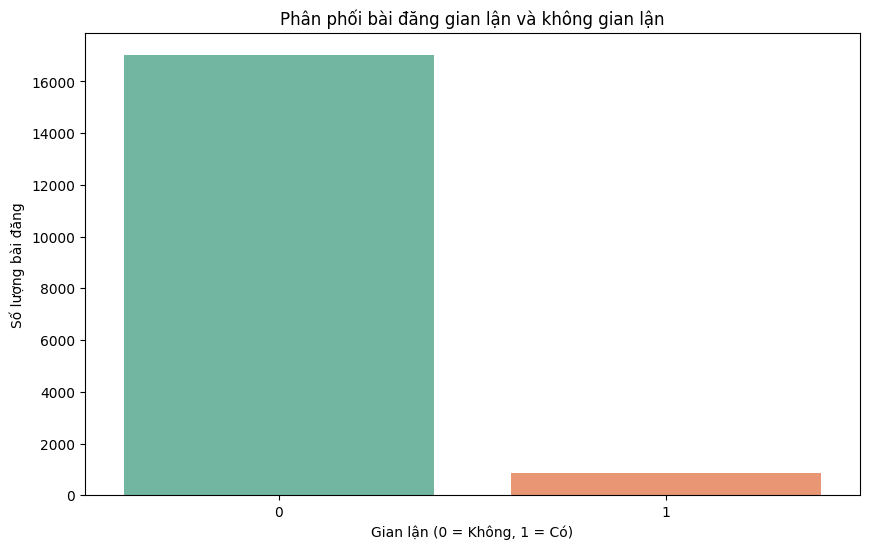

In [16]:
# Vẽ biểu đồ phân phối bài đăng gian lận và không gian lận
plt.figure(figsize=(10, 6))
sns.countplot(x='fraudulent', data=df, palette='Set2')
plt.title('Phân phối bài đăng gian lận và không gian lận')
plt.xlabel('Gian lận (0 = Không, 1 = Có)')
plt.ylabel('Số lượng bài đăng')
plt.show()

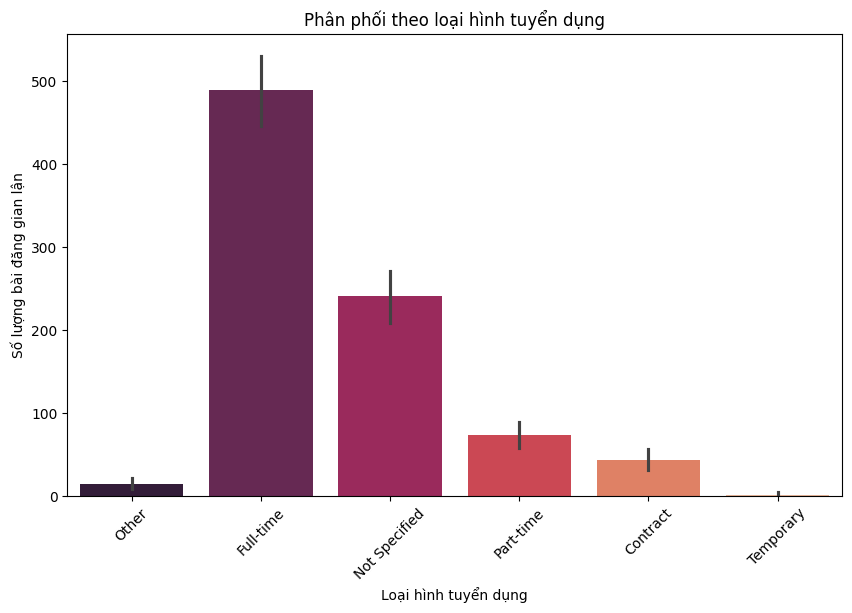

In [17]:
# Vẽ biểu đồ phân phối theo loại hình tuyển dụng
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='employment_type', y='fraudulent', estimator=sum, palette='rocket')
plt.title('Phân phối theo loại hình tuyển dụng')
plt.xlabel('Loại hình tuyển dụng')
plt.ylabel('Số lượng bài đăng gian lận')
plt.xticks(rotation=45)
plt.show()

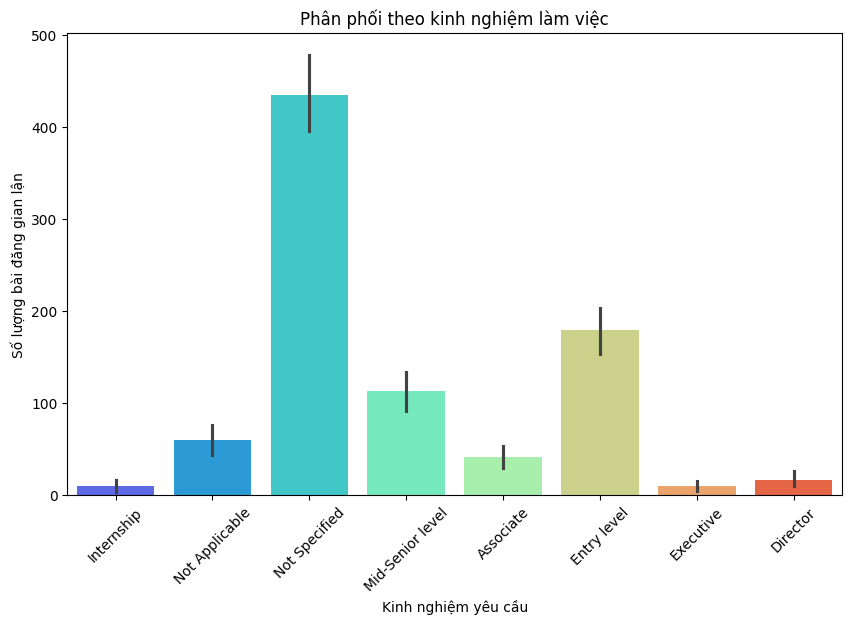

In [18]:
# Vẽ biểu đồ phân phối theo kinh nghiệm làm việc
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='required_experience', y='fraudulent', estimator=sum, palette='rainbow')
plt.title('Phân phối theo kinh nghiệm làm việc')
plt.xlabel('Kinh nghiệm yêu cầu')
plt.ylabel('Số lượng bài đăng gian lận')
plt.xticks(rotation=45)
plt.show()

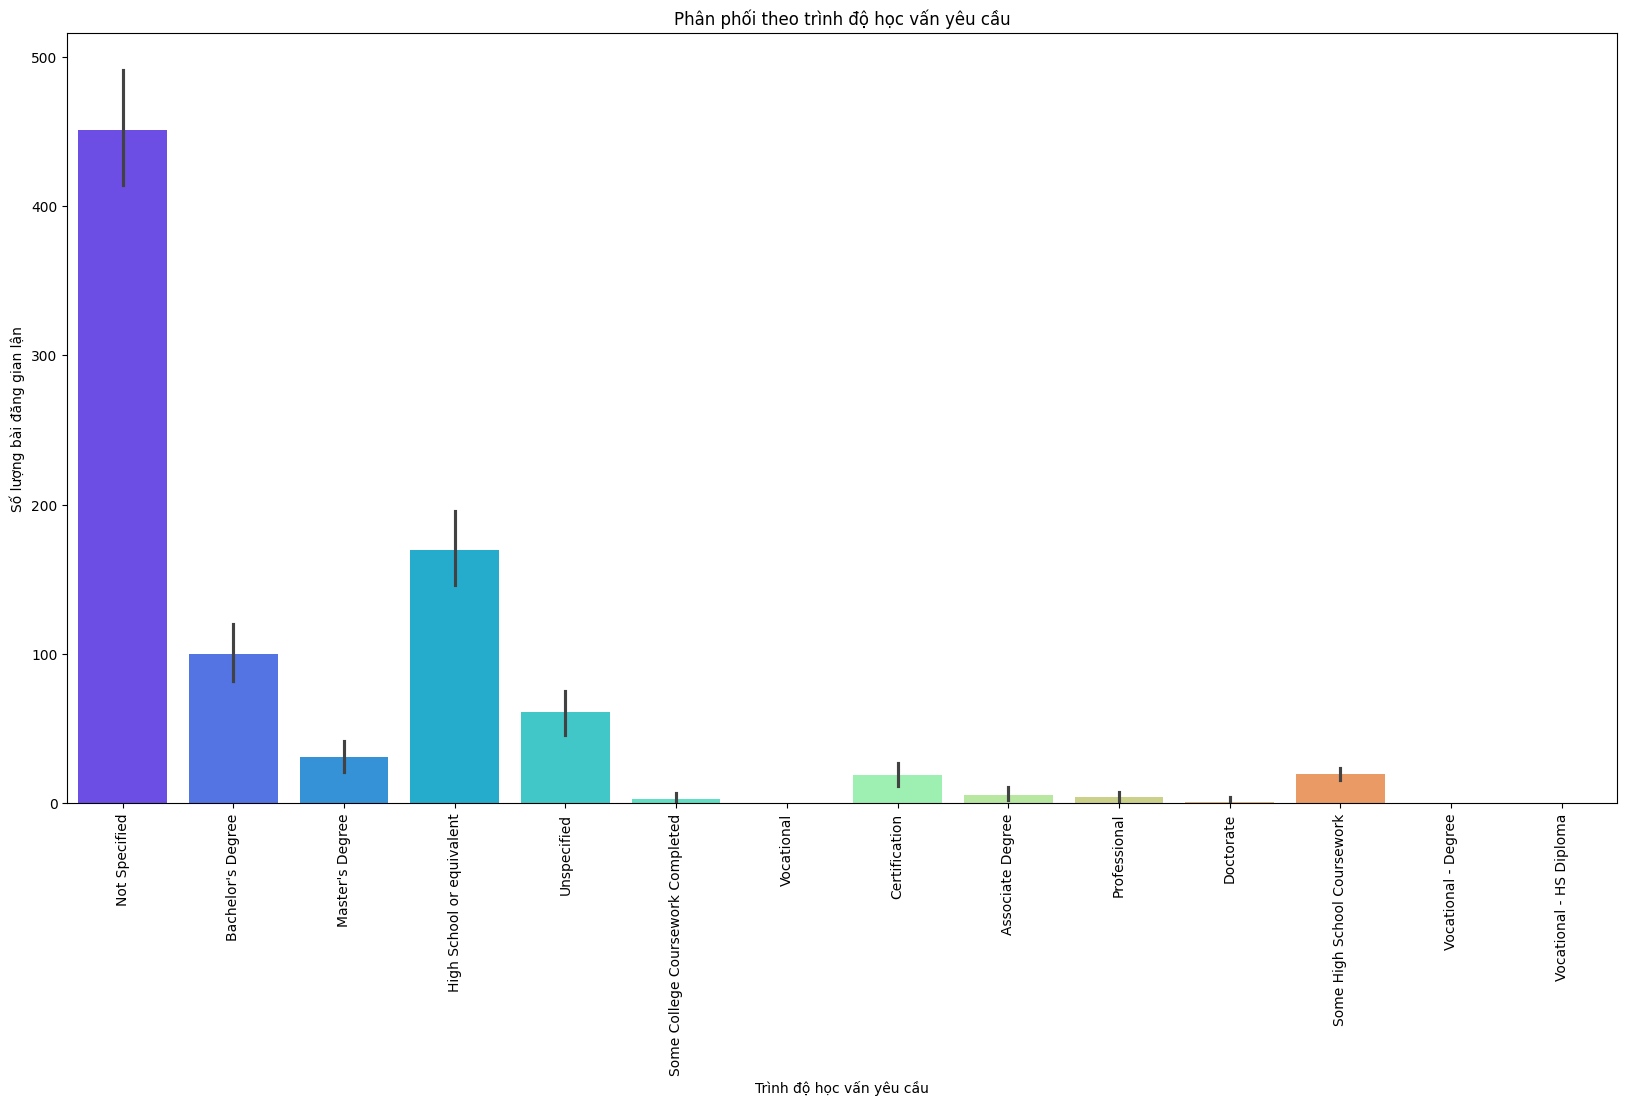

In [19]:
# Vẽ biểu đồ phân phối theo trinh độ học vấn
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='required_education', y='fraudulent', estimator=sum, palette='rainbow')
plt.title('Phân phối theo trình độ học vấn yêu cầu')
plt.xlabel('Trình độ học vấn yêu cầu')
plt.ylabel('Số lượng bài đăng gian lận')
plt.xticks(rotation=90)
plt.show()

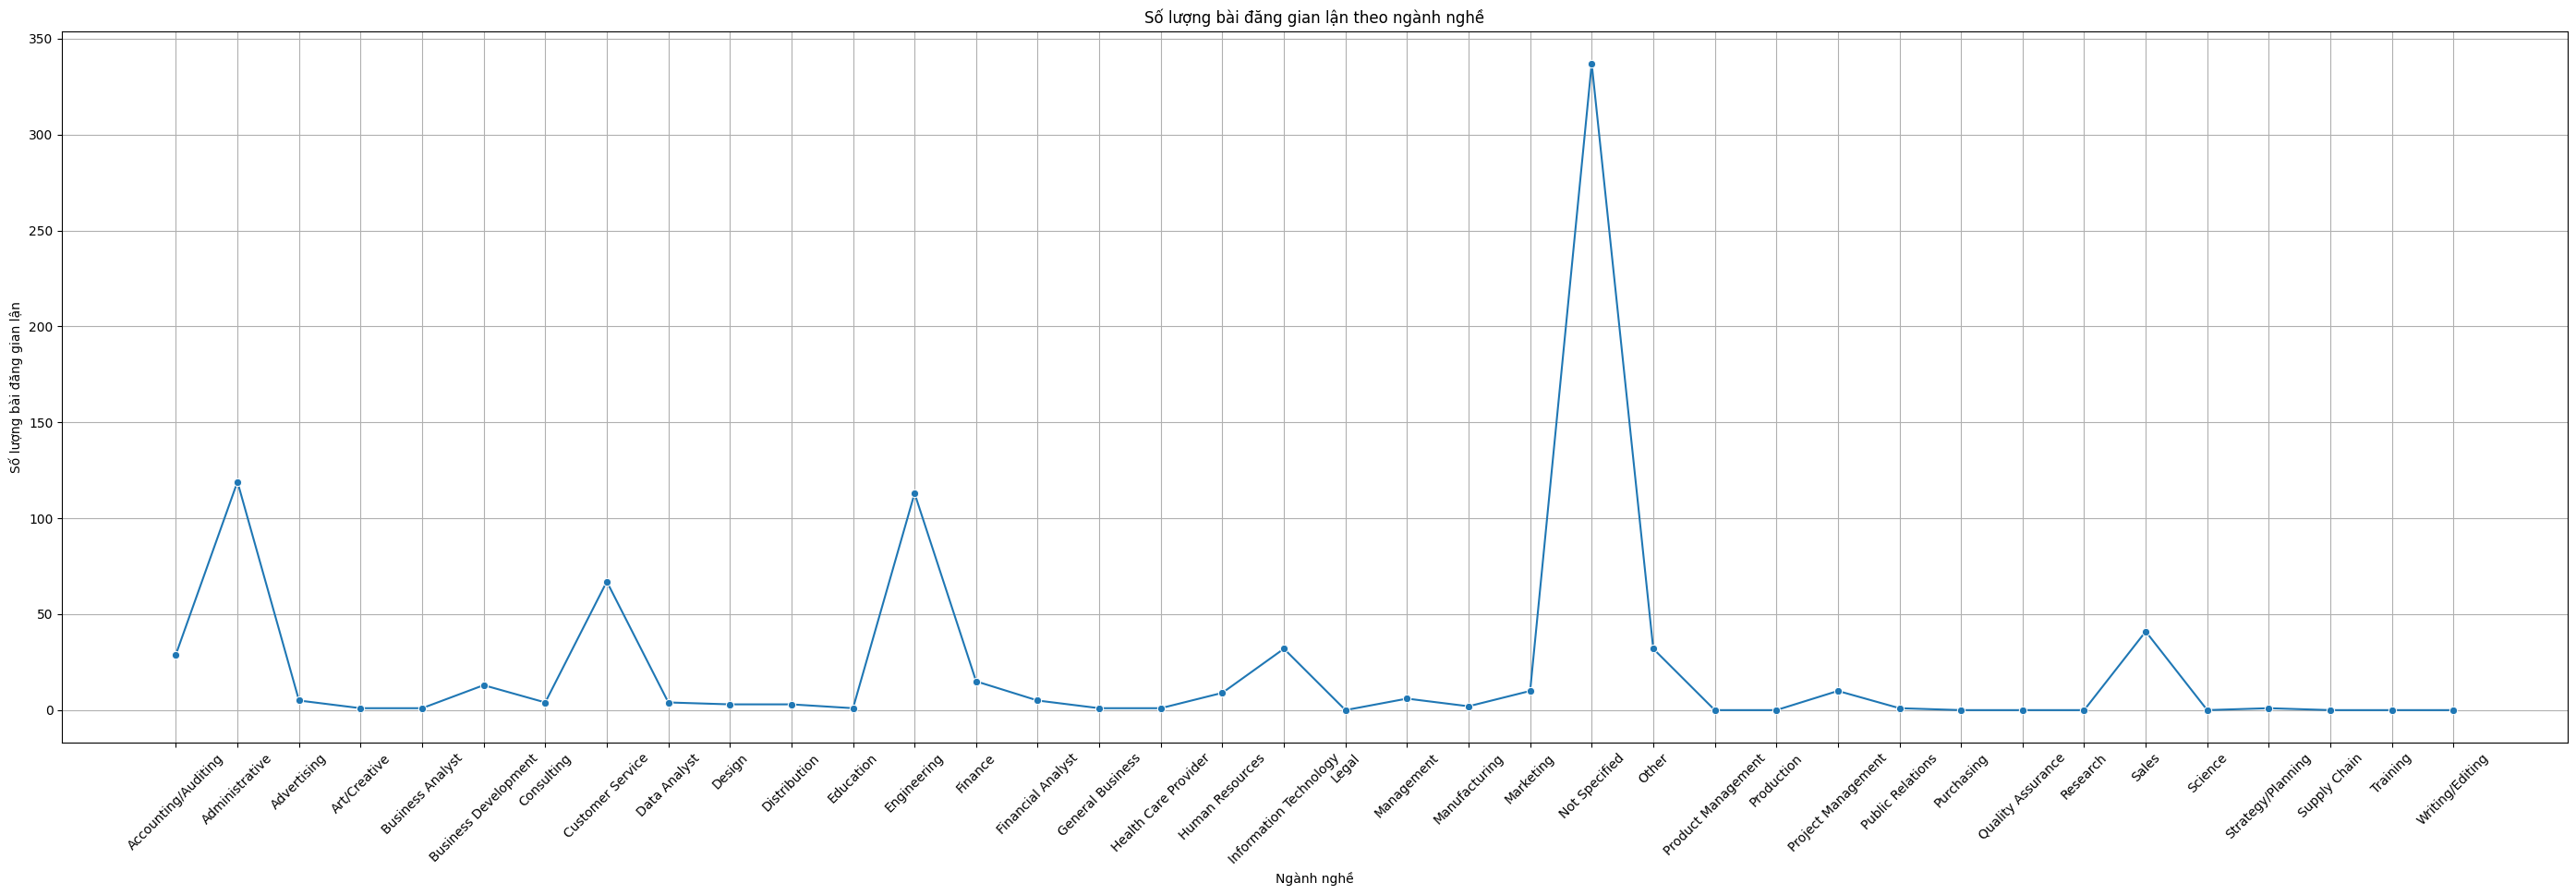

In [20]:
# Tính số lượng bài đăng gian lận theo từng ngành nghề
fraudulent_summary = df.groupby('function')['fraudulent'].sum().reset_index()

plt.figure(figsize=(35, 10))
sns.lineplot(data=fraudulent_summary, x='function', y='fraudulent', marker='o')
plt.title('Số lượng bài đăng gian lận theo ngành nghề')
plt.ylabel('Số lượng bài đăng gian lận')
plt.xlabel('Ngành nghề')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [21]:
# Số lượng công ty có logo và không có logo
print("Số lượng công ty có logo và không có logo:")
print(df['has_company_logo'].value_counts())

Số lượng công ty có logo và không có logo:
has_company_logo
1    14220
0     3660
Name: count, dtype: int64


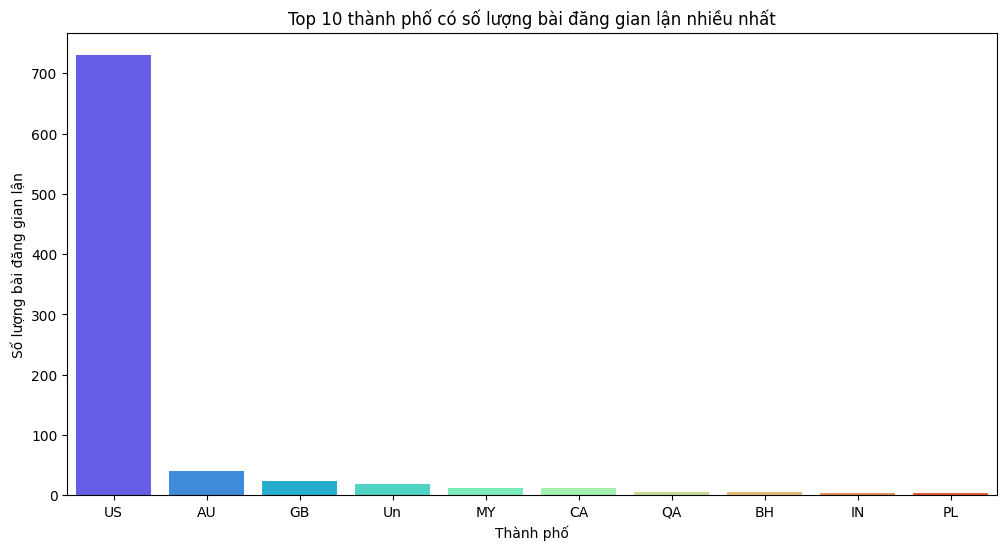

In [22]:
# vẽ biểu đồ các thành phố có số lượng bài đăng gian lận nhiều nhất
top_cities = df[df['fraudulent'] == 1]['location'].str[:2].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='rainbow')
plt.title('Top 10 thành phố có số lượng bài đăng gian lận nhiều nhất')
plt.xlabel('Thành phố')
plt.ylabel('Số lượng bài đăng gian lận')
plt.show()

In [23]:
# Kiểm tra lại tổng số lượng giá trị null trong DataFrame sau khi xử lý
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [24]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Specified,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Missing,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Not Specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Missing,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Not Specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,Not Specified,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Not Specified,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,Not Specified,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Unknown,Not Specified,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,Missing,0,0,0,Full-time,Not Specified,Not Specified,Not Specified,Not Specified,0
17878,17879,Graphic Designer,"NG, LA, Lagos",Unknown,Not Specified,Missing,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [25]:
# Tổng hợp các cột văn bản thành một cột duy nhất 'combined_text'
df['combined_text'] = df[['title', 'location', 'salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department']].apply(lambda x: ' '.join(x), axis=1)

# Loại bỏ các cột văn bản gốc sau khi đã kết hợp
df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department'], inplace=True)

In [26]:
df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,combined_text
0,1,0,1,0,0,"Marketing Intern US, NY, New York Not Specifie..."
1,2,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,0,1,1,0,"Bill Review Manager US, FL, Fort Worth Not Spe..."


In [27]:
# Tách dữ liệu thành hai phần: bài đăng gian lận và bài đăng thật
fake=df[df['fraudulent']==1]['combined_text']
real=df[df['fraudulent']==0]['combined_text']

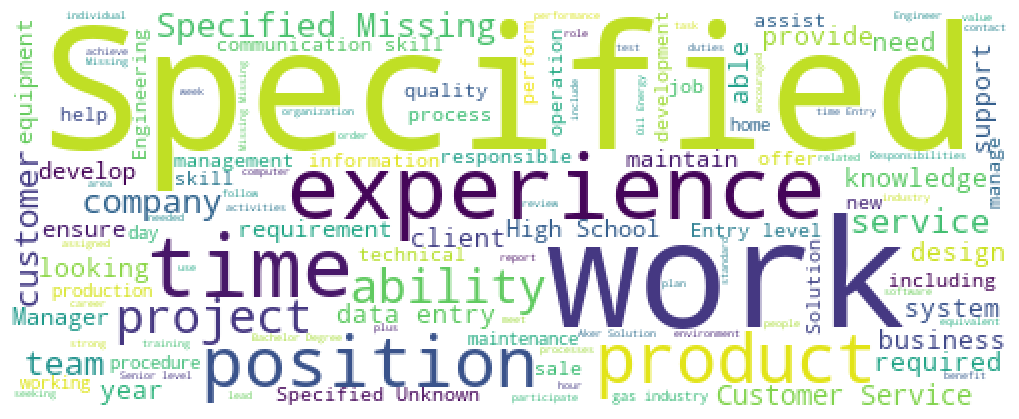

In [28]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(fake))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

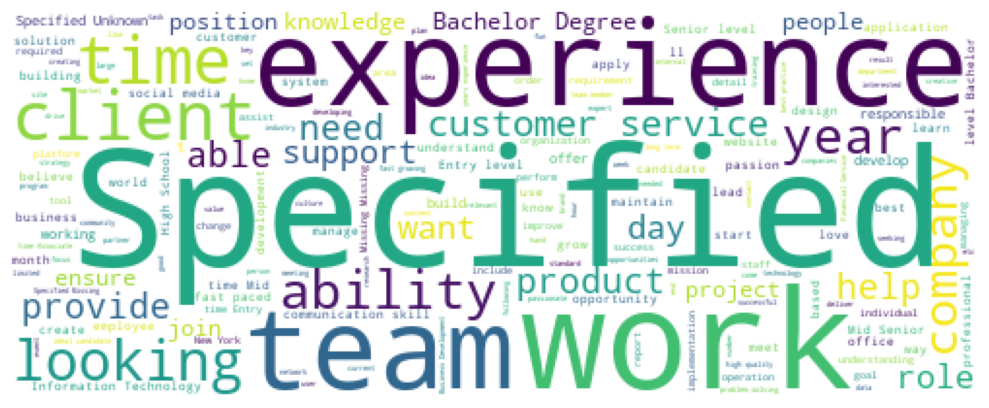

In [29]:
wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(real))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

In [33]:
# --- 1. HÀM LÀM SẠCH (QUAN TRỌNG NHẤT) ---
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # 1. Chuyển thành chữ thường
    text = text.lower()
    
    # 2. Loại bỏ thẻ HTML (ví dụ: <br>, <div>, <li>)
    text = re.sub(r'<.*?>', ' ', text)
    
    # 3. Loại bỏ ký tự đặc biệt và số (chỉ giữ lại chữ cái)
    # Nếu muốn giữ số lương thì sửa thành [^a-z0-9\s]
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 4. Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# --- 2. CHUẨN BỊ DỮ LIỆU ---
# Đảm bảo index chuẩn
df = df.reset_index(drop=True)
df['fraudulent'] = pd.to_numeric(df['fraudulent'], errors='coerce').fillna(0).astype(int)

# Gộp cột (Nếu chưa gộp)
# df['combined_text'] = df['title'] + ' ' + df['description'] + ' ' + df['requirements']

# Xử lý thiếu
df['combined_text'] = df['combined_text'].fillna("").astype(str)

# ÁP DỤNG HÀM LÀM SẠCH (Đây là bước bạn bị thiếu)
print("Đang làm sạch dữ liệu... (Vui lòng đợi)")
df['combined_text'] = df['combined_text'].apply(clean_text)

# --- 3. TRÍCH XUẤT TỪ KHÓA ---
if sum(df['fraudulent'] == 1) == 0:
    print("❌ LỖI: Không có tin giả nào trong dữ liệu!")
else:
    # Cấu hình Vectorizer
    # - ngram_range=(1, 2): Lấy cả cụm 2 từ (ví dụ: "data entry" sẽ có nghĩa hơn là "data" đứng một mình)
    # - min_df=5: Bỏ qua các từ xuất hiện quá ít (dưới 5 lần) -> Giảm rác
    vec = CountVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2), min_df=5)
    
    X = vec.fit_transform(df['combined_text'])
    feature_names = vec.get_feature_names_out()

    # Tách nhóm
    mask_fake = (df['fraudulent'] == 1).values
    mask_real = (df['fraudulent'] == 0).values
    
    fraud_counts = np.array(X[mask_fake].sum(axis=0)).flatten()
    real_counts = np.array(X[mask_real].sum(axis=0)).flatten()

    # Tính toán
    total_fraud = fraud_counts.sum()
    total_real = real_counts.sum()
    
    df_freq = pd.DataFrame({
        'word': feature_names,
        'fraud_count': fraud_counts,
        'real_count': real_counts
    })
    
    # Chuẩn hóa tần suất (để so sánh công bằng)
    df_freq['fraud_rate'] = (df_freq['fraud_count'] + 1) / (total_fraud + 1)
    df_freq['real_rate'] = (df_freq['real_count'] + 1) / (total_real + 1)
    
    # Tính điểm số khác biệt (Difference Score)
    # Điểm càng cao -> Càng đặc trưng cho Tin Giả
    df_freq['score'] = df_freq['fraud_rate'] / df_freq['real_rate']
    
    # Lọc bỏ từ rác (những từ chỉ xuất hiện vài lần ở tin giả)
    df_freq = df_freq[df_freq['fraud_count'] > 10] 

    print("\n=== TOP 20 TỪ KHÓA/CỤM TỪ ĐẶC TRƯNG CỦA TIN GIẢ ===")
    print(df_freq.sort_values(by='score', ascending=False)[['word', 'fraud_count', 'real_count', 'score']].head(20))

Đang làm sạch dữ liệu... (Vui lòng đợi)

=== TOP 20 TỪ KHÓA/CỤM TỪ ĐẶC TRƯNG CỦA TIN GIẢ ===
                          word  fraud_count  real_count      score
3186                 petroleum          101          76  35.549819
2963                   oil gas          197         162  32.599094
1437        engineering design           88          74  31.846132
1047                data entry          281         301  25.059368
1419                encouraged          143         182  21.117347
4618                    typing          129         167  20.766439
2962                oil energy          137         179  20.574748
657                   clerical           81         109  20.005487
4128          solutions global           85         117  19.558899
4560         training provided           77         110  18.858171
4901                 work home          140         204  18.458364
658                      clerk           97         143  18.263816
89    administrative assistant      

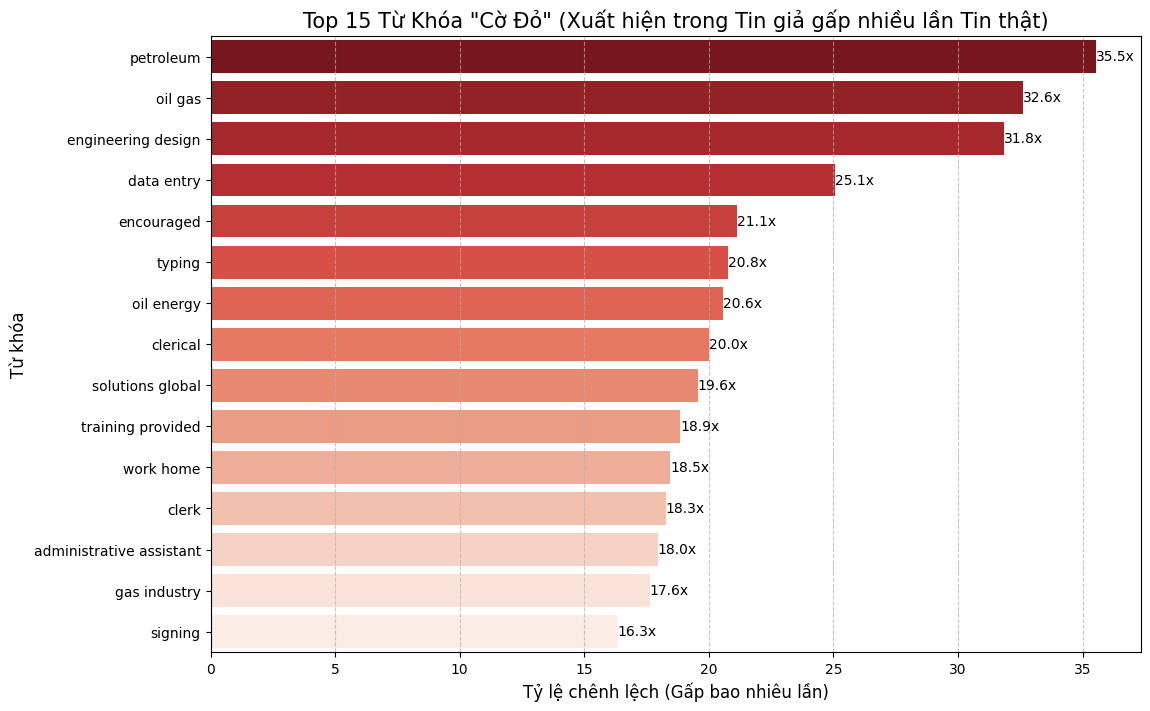

In [37]:
# Lấy Top 15 từ khóa lừa đảo
top_fraud_words = df_freq.sort_values(by='score', ascending=False).head(15)

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.barplot(data=top_fraud_words, x='score', y='word', palette='Reds_r')

plt.title('Top 15 Từ Khóa "Cờ Đỏ" (Xuất hiện trong Tin giả gấp nhiều lần Tin thật)', fontsize=15)
plt.xlabel('Tỷ lệ chênh lệch (Gấp bao nhiêu lần)', fontsize=12)
plt.ylabel('Từ khóa', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Thêm chú thích giá trị lên đầu cột
for index, value in enumerate(top_fraud_words['score']):
    plt.text(value, index, f'{value:.1f}x', va='center')

plt.show()